In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [38]:
df_top_series=pd.read_csv("../Data/imdb_Top_250_TV_Shows.csv")
df_top_series.columns

Index(['Shows Name', 'Release Year', 'Episodes', 'Rating',
       'Rating given by people'],
      dtype='object')

In [39]:
df_top_series.columns=['Title', 'Release Year', 'Episodes', 'Rating',
       'Rating given by people']
df_top_series.head()

,Title,Release Year,Episodes,Rating,Rating given by people
0,Breaking Bad,2008–2013,62 eps,9.5,(2.2M)
1,Planet Earth II,2016,6 eps,9.5,(163K)
2,Planet Earth,2006,11 eps,9.4,(224K)
3,Band of Brothers,2001,10 eps,9.4,(547K)
4,Chernobyl,2019,5 eps,9.3,(912K)


In [4]:
df_top_movies=(pd.read_csv("../Data/imdb_top_250_movies.csv",encoding='latin1'))
df_mis_calificaciones=pd.read_csv("../Data/mis_calificaciones_imdb.csv")
df_netflix=pd.read_csv("../Data/netflix_titles.csv")
df_amazon=pd.read_csv("../Data/amazon_prime_titles.csv")
df_hbo=pd.read_csv("../Data/hbo_titles.csv")

In [8]:
df_mis_calificaciones[df_mis_calificaciones["Title Type"]=="Vídeo"]

,Const,Your Rating,Date Rated,Title,Original Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
130,tt8884146,8,2021-10-19,American History X: Deleted Scenes,American History X: Deleted Scenes,https://www.imdb.com/title/tt8884146,Vídeo,8.4,7,1998,"Corto, Drama",25470,1998,NaN


In [9]:
df_top_movies

,Title,Release_year,Duration,Duration_in_minutes,Rating,Content_rating,No_of_votes,No_of_votes_numeric
0,The Shawshank Redemption,1994,2h 22m,142,9.3,R,3M,3000000
1,The Godfather,1972,2h 55m,175,9.2,R,2.1M,2100000
2,The Dark Knight,2008,2h 32m,152,9.0,PG-13,3M,3000000
3,The Godfather Part II,1974,3h 22m,202,9.0,R,1.4M,1400000
4,12 Angry Men,1957,1h 36m,96,9.0,Approved,898K,898000
...,...,...,...,...,...,...,...,...
245,Amores Perros,2000,2h 34m,154,8.0,R,257K,257000
246,Rebecca,1940,2h 10m,130,8.1,Approved,150K,150000
247,The Help,2011,2h 26m,146,8.1,PG-13,504K,504000
248,A Silent Voice: The Movie,2016,2h 10m,130,8.1,Not Rated,110K,110000


In [50]:
def cuantas_top(df_top,df_plataforma,en_porcentaje):
    lista_top=[]
    for movie in df_top["Title"]:
        for titulo_plataforma in df_plataforma["title"]:
            if movie==titulo_plataforma:
                lista_top.append(movie)
    absoluto=len(lista_top)
    porcentaje=round((len(lista_top)/len(df_top["Title"])*100),2)
    if en_porcentaje:
        return porcentaje
    else:
        return absoluto
       

In [41]:
diccionario_valoraciones={"mejores 250 peliculas segun imdb": df_top_movies,"mejores 250 series segun imdb":df_top_series,"peliculas ya visualizadas por Guillermo": df_mis_calificaciones}
diccionario_plataformas={"Netflix":df_netflix,"Amazon Prime Video":df_amazon,"HBO":df_hbo}
lista_bool=[True,False]

In [51]:
for nombre_top, dataframe in diccionario_valoraciones.items():
    print(nombre_top)
    for plataforma, contenido in diccionario_plataformas.items():
        print(f"    {plataforma}")
        for booleano in lista_bool:
            valor=cuantas_top(dataframe,contenido,booleano)
            if booleano==True:
                print(f"        {plataforma} cuenta con un {valor} % de las {nombre_top}")
            else:
                print(f"        {plataforma} cuenta con {valor} de las {nombre_top}")
        

mejores 250 peliculas segun imdb
    Netflix
        Netflix cuenta con un 21.6 % de las mejores 250 peliculas segun imdb
        Netflix cuenta con 54 de las mejores 250 peliculas segun imdb
    Amazon Prime Video
        Amazon Prime Video cuenta con un 4.4 % de las mejores 250 peliculas segun imdb
        Amazon Prime Video cuenta con 11 de las mejores 250 peliculas segun imdb
    HBO
        HBO cuenta con un 48.8 % de las mejores 250 peliculas segun imdb
        HBO cuenta con 122 de las mejores 250 peliculas segun imdb
mejores 250 series segun imdb
    Netflix
        Netflix cuenta con un 29.6 % de las mejores 250 series segun imdb
        Netflix cuenta con 74 de las mejores 250 series segun imdb
    Amazon Prime Video
        Amazon Prime Video cuenta con un 10.0 % de las mejores 250 series segun imdb
        Amazon Prime Video cuenta con 25 de las mejores 250 series segun imdb
    HBO
        HBO cuenta con un 26.8 % de las mejores 250 series segun imdb
        HBO cuenta con

In [52]:
def crear_dataframe_resumen():
    # Inicializamos el diccionario con listas vacías
    resumen = {
        "Top 250 Movies": [],
        "Top 250 Series": [],
        "197 Peliculas Autovaloradas": []
    }

    # Iteramos sobre cada plataforma
    for plataforma, df_plataforma in diccionario_plataformas.items():
        # Contar películas y series para cada plataforma
        top_movies_count = cuantas_top(df_top_movies, df_plataforma, en_porcentaje=False)
        top_series_count = cuantas_top(df_top_series, df_plataforma, en_porcentaje=False)
        autovaloradas_count = cuantas_top(df_mis_calificaciones, df_plataforma, en_porcentaje=False)

        # Añadir los valores al diccionario
        resumen["Top 250 Movies"].append(top_movies_count)
        resumen["Top 250 Series"].append(top_series_count)
        resumen["197 Peliculas Autovaloradas"].append(autovaloradas_count)
    
    # Crear el DataFrame usando las plataformas como índices
    df_resumen = pd.DataFrame(resumen, index=diccionario_plataformas.keys())
    return df_resumen    

In [53]:
df_resumen=crear_dataframe_resumen()

In [54]:
df_resumen

,Top 250 Movies,Top 250 Series,197 Peliculas Autovaloradas
Netflix,54,74,27
Amazon Prime Video,11,25,5
HBO,122,67,28


In [56]:
def agregar_columnas_booleanas(df_base, diccionario_plataformas):
    """
    Crea un nuevo DataFrame basado en df_base y agrega columnas booleanas 
    que indican si una película o serie está en cada plataforma.

    Parámetros:
        - df_base: DataFrame base (ej. df_top_movies, df_top_series).
        - diccionario_plataformas: Diccionario con DataFrames de las plataformas.

    Retorna:
        - Un DataFrame con las columnas originales más las booleanas por plataforma.
    """
    # Creamos una copia del DataFrame base para no modificar el original
    df_con_plataformas = df_base.copy()

    # Iteramos sobre cada plataforma y su DataFrame
    for plataforma, df_plataforma in diccionario_plataformas.items():
        # Creamos la columna booleana: True si el título está en el DataFrame de la plataforma
        df_con_plataformas[plataforma] = df_con_plataformas["Title"].isin(df_plataforma["title"])
    
    return df_con_plataformas

In [57]:
df_top_movies_bool=agregar_columnas_booleanas(df_top_movies,diccionario_plataformas)
df_top_movies_bool

,Title,Release_year,Duration,Duration_in_minutes,Rating,Content_rating,No_of_votes,No_of_votes_numeric,Netflix,Amazon Prime Video,HBO
0,The Shawshank Redemption,1994,2h 22m,142,9.3,R,3M,3000000,False,False,True
1,The Godfather,1972,2h 55m,175,9.2,R,2.1M,2100000,False,False,True
2,The Dark Knight,2008,2h 32m,152,9.0,PG-13,3M,3000000,False,False,True
3,The Godfather Part II,1974,3h 22m,202,9.0,R,1.4M,1400000,False,False,True
4,12 Angry Men,1957,1h 36m,96,9.0,Approved,898K,898000,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
245,Amores Perros,2000,2h 34m,154,8.0,R,257K,257000,False,False,False
246,Rebecca,1940,2h 10m,130,8.1,Approved,150K,150000,True,False,False
247,The Help,2011,2h 26m,146,8.1,PG-13,504K,504000,True,False,False
248,A Silent Voice: The Movie,2016,2h 10m,130,8.1,Not Rated,110K,110000,False,False,False


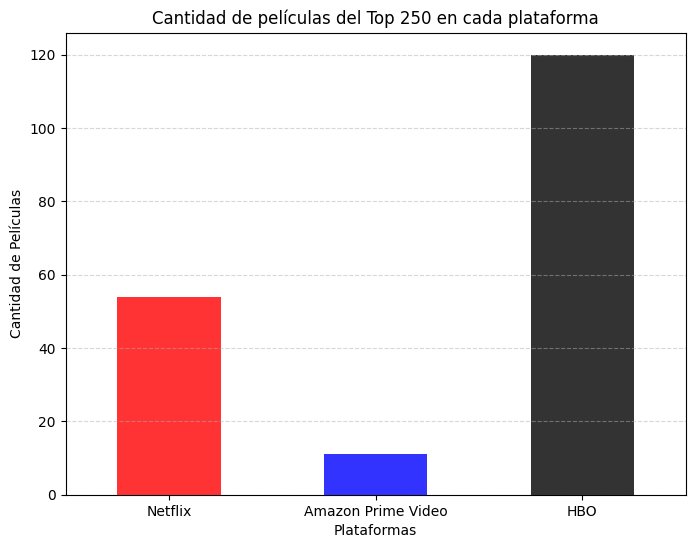

In [71]:
# Sumar los valores True en cada columna de plataforma
conteos = df_top_movies_bool[["Netflix", "Amazon Prime Video", "HBO"]].sum()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
conteos.plot(kind="bar",color=["red","blue","black"],alpha= 0.8)
plt.title("Cantidad de películas del Top 250 en cada plataforma")
plt.xlabel("Plataformas")
plt.ylabel("Cantidad de Películas")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

In [72]:
df_resumen

,Top 250 Movies,Top 250 Series,197 Peliculas Autovaloradas
Netflix,54,74,27
Amazon Prime Video,11,25,5
HBO,122,67,28


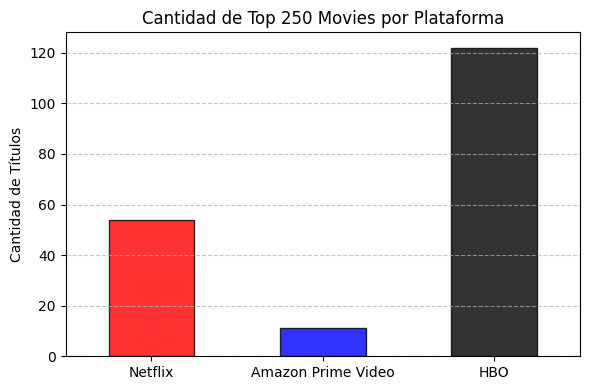

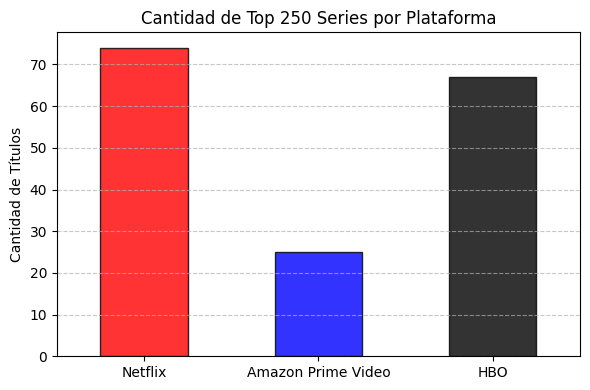

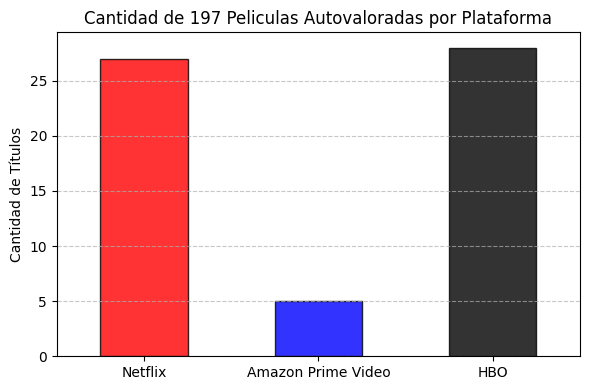

In [77]:
for columna in df_resumen.columns:  # Iteramos sobre cada columna
        plt.figure(figsize=(6, 4))
        df_resumen[columna].plot(kind="bar", color=["red","blue","black"], alpha= 0.8,edgecolor="black")
        plt.title(f"Cantidad de {columna} por Plataforma")
        plt.ylabel("Cantidad de Títulos")
        plt.xticks(rotation=0)
        plt.grid(axis="y", linestyle="--", alpha=0.7)
        plt.tight_layout()
        plt.show()

In [27]:
lista_top

['The Lord of the Rings: The Return of the King',
 "Schindler's List",
 'Pulp Fiction',
 'The Lord of the Rings: The Two Towers',
 'Inception',
 'The Matrix',
 'City of God',
 'The Pianist',
 'Psycho',
 'The Departed',
 'American History X',
 'The Intouchables',
 'Once Upon a Time in the West',
 'Django Unchained',
 'The Lives of Others',
 'Avengers: Infinity War',
 'Spider-Man: Into the Spider-Verse',
 'Inglourious Basterds',
 'American Beauty',
 'Joker',
 '3 Idiots',
 'Once Upon a Time in America',
 'The Hunt',
 'The Apartment',
 'A Clockwork Orange',
 'A Separation',
 'Indiana Jones and the Last Crusade',
 'Taxi Driver',
 'Dangal',
 'Shutter Island',
 'There Will Be Blood',
 "Pan's Labyrinth",
 'Kill Bill: Vol. 1',
 'Monty Python and the Holy Grail',
 'Lock, Stock and Two Smoking Barrels',
 'V for Vendetta',
 'Klaus',
 'Raging Bull',
 'Trainspotting',
 'Catch Me If You Can',
 'Warrior',
 'Gran Torino',
 'Million Dollar Baby',
 'Jaws',
 'Rocky',
 'Spotlight',
 'Room',
 'Platoon',
 'R